# Doc2Vec model building & visualizations

## 1. Prep data

In [22]:
# 1. Article data clean
# Load data
import pandas as pd
article = pd.read_csv('article_info_df_final.csv')

In [23]:
article.head()

,url,abstract,snippet,headline,lead_paragraph,section,headline_clean,pub_date2,month,id
0,https://www.nytimes.com/2020/01/03/us/anti-sem...,"Attacks have been traditionally underreported,...","Attacks have been traditionally underreported,...","‘A Different Era’: Anti-Semitic Crimes, and Ef...",When slurs were spray-painted on a kosher mark...,U.S.,different era anti semitic crimes efforts trac...,2020-01-03,1,1
1,https://www.nytimes.com/2020/01/01/arts/woody-...,He deftly manipulated electronic images to pro...,He deftly manipulated electronic images to pro...,"Woody Vasulka, Whose Video Art Extended Bounda...","Woody Vasulka, an experimental video artist wh...",Arts,woody vasulka video art extended boundaries dies,2020-01-01,1,2
2,https://www.nytimes.com/2020/01/02/movies/osca...,The past definitely wasn’t past for directors ...,The past definitely wasn’t past for directors ...,Will the Oscars Get as Nostalgic as Hollywood ...,"It’s Oscar time, which means everything new is...",Movies,oscars nostalgic hollywood did,2020-01-02,1,3
3,https://www.nytimes.com/2020/01/03/opinion/sim...,Forget fad diets and fitness gimmicks. Just st...,Forget fad diets and fitness gimmicks. Just st...,"How to Be Healthy, in Just 48 Words","Daytime television talk shows, popular podcast...",Opinion,healthy just words,2020-01-03,1,4
4,https://www.nytimes.com/2020/01/03/fashion/wed...,Linda Tracy and Peter Tracy had been married 3...,Linda Tracy and Peter Tracy had been married 3...,I Do. Take 2.,When Donna Adelsberg ran into her best friend’...,Fashion & Style,NaN,2020-01-03,1,5


In [24]:
# Lead paragraph need to be filtered

filter_out = ['This briefing is no longer updating. Read the latest developments in the coronavirus outbreak here.',
             '[Want to get New York Today by email? Here’s the sign-up.]',
             'This briefing has ended. Read our global live coverage on the coronavirus pandemic here. ',
             '[This briefing has ended. For the latest updates on the coronavirus, read Friday’s live coverage.]']


lead_paragraph_filter = []

for i in article['lead_paragraph']:
    if i not in filter_out:
        lead_paragraph_filter.append(i)
    else:
        lead_paragraph_filter.append(None)

article['lead_paragraph_filter'] = lead_paragraph_filter

In [25]:
# Concatenate all information from abstract, snippet, headline
# Clean the text

article['article_agg'] = article.agg('{0[abstract]} {0[snippet]} {0[headline]} {0[lead_paragraph_filter]}'.format, axis=1)
article = article.drop(['headline_clean', 'pub_date2', 'month', 'id'], axis=1)
article.head()

,url,abstract,snippet,headline,lead_paragraph,section,lead_paragraph_filter,article_agg
0,https://www.nytimes.com/2020/01/03/us/anti-sem...,"Attacks have been traditionally underreported,...","Attacks have been traditionally underreported,...","‘A Different Era’: Anti-Semitic Crimes, and Ef...",When slurs were spray-painted on a kosher mark...,U.S.,When slurs were spray-painted on a kosher mark...,"Attacks have been traditionally underreported,..."
1,https://www.nytimes.com/2020/01/01/arts/woody-...,He deftly manipulated electronic images to pro...,He deftly manipulated electronic images to pro...,"Woody Vasulka, Whose Video Art Extended Bounda...","Woody Vasulka, an experimental video artist wh...",Arts,"Woody Vasulka, an experimental video artist wh...",He deftly manipulated electronic images to pro...
2,https://www.nytimes.com/2020/01/02/movies/osca...,The past definitely wasn’t past for directors ...,The past definitely wasn’t past for directors ...,Will the Oscars Get as Nostalgic as Hollywood ...,"It’s Oscar time, which means everything new is...",Movies,"It’s Oscar time, which means everything new is...",The past definitely wasn’t past for directors ...
3,https://www.nytimes.com/2020/01/03/opinion/sim...,Forget fad diets and fitness gimmicks. Just st...,Forget fad diets and fitness gimmicks. Just st...,"How to Be Healthy, in Just 48 Words","Daytime television talk shows, popular podcast...",Opinion,"Daytime television talk shows, popular podcast...",Forget fad diets and fitness gimmicks. Just st...
4,https://www.nytimes.com/2020/01/03/fashion/wed...,Linda Tracy and Peter Tracy had been married 3...,Linda Tracy and Peter Tracy had been married 3...,I Do. Take 2.,When Donna Adelsberg ran into her best friend’...,Fashion & Style,When Donna Adelsberg ran into her best friend’...,Linda Tracy and Peter Tracy had been married 3...


In [26]:
import re
pattern = re.compile(r'[A-Za-z0-9\-]{3,50}')
article['clean'] = article['article_agg'].str.findall(pattern).str.join(' ')
brief_clean = [re.sub("’s|'s'", '', row) for row in article['article_agg']] # remove 's
brief_clean = [re.sub("n't", ' not', row) for row in brief_clean] # change n't to not
brief_clean = [re.sub('[^A-z0-9]', ' ', row) for row in brief_clean] # remove non alpha numerics
brief_clean = [re.sub('-', ' ', row) for row in brief_clean]
brief_clean = [re.sub('\s+$', '', row) for row in brief_clean] # strip whitespace
brief_clean = [re.sub('\s+', ' ', row) for row in brief_clean] # strip whitespace

brief_clean[0:2] # check

['Attacks have been traditionally underreported but fighting the scourge in hate crimes begins with better data experts say Attacks have been traditionally underreported but fighting the scourge in hate crimes begins with better data experts say A Different Era Anti Semitic Crimes and Efforts to Track Them Climb When slurs were spray painted on a kosher market in West Los Angeles it was classified by law enforcement as an anti Semitic hate crime But when a swastika was carved into a park picnic table or spray painted on a stop sign it was classified as an anti religious hate crime',
 'He deftly manipulated electronic images to produce otherworldly sometimes jarring visions He also founded with his wife a landmark performance space He deftly manipulated electronic images to produce otherworldly sometimes jarring visions He also founded with his wife a landmark performance space Woody Vasulka Whose Video Art Extended Boundaries Dies at 82 Woody Vasulka an experimental video artist who fo

In [27]:
import spacy
nlp = spacy.load("en_core_web_sm")
def cleaning(doc):
    # Lemmatize & remove stop words
    text = [str(token.lemma_).lower() for token in doc if not token.is_stop]
    return text

In [28]:
%%time
txt = [cleaning(doc) for doc in nlp.pipe(brief_clean, disable = ['tagger', 'parser'])]

Wall time: 58.5 s


In [29]:
article['clean'] = txt
article.head()

,url,abstract,snippet,headline,lead_paragraph,section,lead_paragraph_filter,article_agg,clean
0,https://www.nytimes.com/2020/01/03/us/anti-sem...,"Attacks have been traditionally underreported,...","Attacks have been traditionally underreported,...","‘A Different Era’: Anti-Semitic Crimes, and Ef...",When slurs were spray-painted on a kosher mark...,U.S.,When slurs were spray-painted on a kosher mark...,"Attacks have been traditionally underreported,...","[attacks, traditionally, underreport, fight, s..."
1,https://www.nytimes.com/2020/01/01/arts/woody-...,He deftly manipulated electronic images to pro...,He deftly manipulated electronic images to pro...,"Woody Vasulka, Whose Video Art Extended Bounda...","Woody Vasulka, an experimental video artist wh...",Arts,"Woody Vasulka, an experimental video artist wh...",He deftly manipulated electronic images to pro...,"[deftly, manipulate, electronic, image, produc..."
2,https://www.nytimes.com/2020/01/02/movies/osca...,The past definitely wasn’t past for directors ...,The past definitely wasn’t past for directors ...,Will the Oscars Get as Nostalgic as Hollywood ...,"It’s Oscar time, which means everything new is...",Movies,"It’s Oscar time, which means everything new is...",The past definitely wasn’t past for directors ...,"[past, definitely, wasn, t, past, director, li..."
3,https://www.nytimes.com/2020/01/03/opinion/sim...,Forget fad diets and fitness gimmicks. Just st...,Forget fad diets and fitness gimmicks. Just st...,"How to Be Healthy, in Just 48 Words","Daytime television talk shows, popular podcast...",Opinion,"Daytime television talk shows, popular podcast...",Forget fad diets and fitness gimmicks. Just st...,"[forget, fad, diet, fitness, gimmick, stick, b..."
4,https://www.nytimes.com/2020/01/03/fashion/wed...,Linda Tracy and Peter Tracy had been married 3...,Linda Tracy and Peter Tracy had been married 3...,I Do. Take 2.,When Donna Adelsberg ran into her best friend’...,Fashion & Style,When Donna Adelsberg ran into her best friend’...,Linda Tracy and Peter Tracy had been married 3...,"[linda, tracy, peter, tracy, marry, 37, year, ..."


In [30]:
article['article_id'] = article.index + 1 # add article_id

In [31]:
article.to_csv('article_info.csv', index = False) # export

In [15]:
# Read in the dataset with comment information
comment = pd.read_csv('nyt_article_comment_merged.csv') # this one also has article information
comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316614 entries, 0 to 316613
Data columns (total 24 columns):
userName              316573 non-null object
cleanName             316332 non-null object
comment               316614 non-null object
n_recommend           316614 non-null int64
nyt_select            316614 non-null bool
ttlCommentNum         316614 non-null int64
time_order_cap        316614 non-null int64
url                   316614 non-null object
n_rec_log             316614 non-null float64
ttl_comment_log       316614 non-null float64
gender                316614 non-null int64
category_             316614 non-null object
biz                   316614 non-null bool
flesch                316614 non-null float64
flesch_grade          316614 non-null float64
word_count            316614 non-null int64
sentence_count        316614 non-null int64
avg_sentence_len      316614 non-null float64
dale_chall            316614 non-null float64
sentiment_polarity    316614 non-null 

In [16]:
comment = comment.drop(['cleanName', 'category_', 'flesch_grade', 'sentence_count', 'avg_sentence_len', 'dale_chall', 'sentiment_polarity'], axis=1)

In [17]:
comment.head()

,userName,comment,n_recommend,nyt_select,ttlCommentNum,time_order_cap,url,n_rec_log,ttl_comment_log,gender,biz,flesch,word_count,section,headline,abstract,lead_paragraph
0,Bill,Gee. An all-time low of 0.7% on the ten year b...,178,False,397,1,https://www.nytimes.com/2020/03/06/business/st...,5.187386,5.986452,0,True,104.13,19,Business Day,"Stocks and Bond Yields Sink, Capping a Week of...",Stocks fell and investors rushed to the safety...,Wall Street was gripped by another wave of wor...
1,Matt Proud,The United States earned this for its myopic f...,333,False,397,2,https://www.nytimes.com/2020/03/06/business/st...,5.811141,5.986452,0,True,62.68,17,Business Day,"Stocks and Bond Yields Sink, Capping a Week of...",Stocks fell and investors rushed to the safety...,Wall Street was gripped by another wave of wor...
2,tanstaafl,Japan has 1000+ cases but only 8 deaths wherea...,345,False,397,3,https://www.nytimes.com/2020/03/06/business/st...,5.846439,5.986452,2,True,44.41,35,Business Day,"Stocks and Bond Yields Sink, Capping a Week of...",Stocks fell and investors rushed to the safety...,Wall Street was gripped by another wave of wor...
3,Conch Republican,In some ways it's not hard to see this as a ma...,16,False,397,4,https://www.nytimes.com/2020/03/06/business/st...,2.833213,5.986452,2,True,-40.18,110,Business Day,"Stocks and Bond Yields Sink, Capping a Week of...",Stocks fell and investors rushed to the safety...,Wall Street was gripped by another wave of wor...
4,megachulo,Coronavirus is not Ebola it is more along the ...,21,False,397,5,https://www.nytimes.com/2020/03/06/business/st...,3.091042,5.986452,2,True,69.62,111,Business Day,"Stocks and Bond Yields Sink, Capping a Week of...",Stocks fell and investors rushed to the safety...,Wall Street was gripped by another wave of wor...


In [18]:
import re
pattern = re.compile(r'[A-Za-z0-9\-]{3,50}')
comment['clean'] = comment['comment'].str.findall(pattern).str.join(' ')
brief_clean = [re.sub("'s'", '', row) for row in comment['comment']] # remove 's
brief_clean = [re.sub("n't", ' not', row) for row in brief_clean] # change n't to not
brief_clean = [re.sub('[^A-z0-9]', ' ', row) for row in brief_clean] # remove non alpha numerics
brief_clean = [re.sub('-', ' ', row) for row in brief_clean]
brief_clean = [re.sub('\s+$', '', row) for row in brief_clean] # strip whitespace
brief_clean = [re.sub('\s+', ' ', row) for row in brief_clean] # strip whitespace

brief_clean[0:2] # check

['Gee An all time low of 0 7 on the ten year bond I wonder when trump will boast about this',
 'The United States earned this for its myopic focus on money and profit over people and wellbeing']

In [16]:
%%time
txt = [cleaning(doc) for doc in nlp.pipe(brief_clean, disable = ['tagger', 'parser'])]

Wall time: 16min 17s


In [18]:
comment['clean'] = txt

In [21]:
comment.to_csv('comment_info.csv', index = False)

# merge the two

In [32]:
import pandas as pd
comment = pd.read_csv('comment_info.csv')
article = pd.read_csv('article_info.csv')

In [33]:
merged = pd.merge(comment, article, how = 'left', on = ('url', 'headline', 'abstract', 'lead_paragraph','section'), suffixes = ('_comment', '_article'))

In [34]:
merged.tail()

,userName,comment,n_recommend,nyt_select,ttlCommentNum,time_order_cap,url,n_rec_log,ttl_comment_log,gender,...,section,headline,abstract,lead_paragraph,clean_comment,snippet,lead_paragraph_filter,article_agg,clean_article,article_id
316609,ellienyc,Does anyone know what the rule is on hospital ...,8,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,2.197225,6.120297,2,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['know', 'rule', 'hospital', 'worker', 'doc', ...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316610,Emily,Great news about the slowing doubling rate. Th...,5,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,1.791759,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['great', 'news', 'slow', 'double', 'rate', 's...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316611,Kelly,The actual death rate of this is higher than t...,10,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,2.397895,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['actual', 'death', 'rate', 'high', 'seasonal'...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316612,Abby,while a national stay at home order would not ...,21,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,3.091042,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['national', 'stay', 'home', 'order', 'popular...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316613,Lili Chou Treadway,It concerns me that restaurant workers prepari...,37,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,3.637586,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['concern', 'restaurant', 'worker', 'prepare',...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0


In [35]:
merged.groupby(['biz', 'section']).agg({'comment':'count'}) # 230 comments are classified to be in "Business day", but is classified as "false" on `biz` variable

comment
biz   section                      
False Arts                     6211
      Automobiles                27
      Books                    2265
      Business Day              230
      Climate                  2999
      Education                  67
      Fashion & Style           168
      Food                     5170
      Health                   5873
      Magazine                 9436
      Movies                   2820
      New York                16699
      Opinion                 98185
      Parenting                   9
      Podcasts                  969
      Reader Center             939
      Real Estate              1855
      Science                  2488
      Smarter Living            271
      Sports                   3344
      Style                    4995
      Sunday Review             224
      T Magazine                667
      Technology               3465
      The Learning Network    14875
      The Upshot               9663
      The Weekly                120
      Theater                   985
      Travel                   3610
      U.S.                    62371
      Well                     8060
      World                   27518
True  Business Day            18453

In [36]:
set(merged[(merged['biz']==False) & (merged['section']=='Business Day')]['url'].values.tolist())

{'https://www.nytimes.com/article/coronavirus-stimulus-package-questions-answers.html',
 'https://www.nytimes.com/article/what-is-a-will-and-how-to-make-one.html'}

Decision to make ... business article or not? It seems that those articles _are_ business, or at least finance related, because it requires financial literacy and knowledge. 

Those are very common topics that people talk about, and are areas where women are often ignored despite their proficiency.

I decide to stick to my "biz"

In [61]:
merged.shape

(316614, 23)

In [62]:
# Filter out comments without comment or article information
set([i for i in merged['clean_comment'] if len(str(i))<5])

{'[]'}

In [63]:
# Filter out comments without comment or article information
set([i for i in merged['clean_article'] if len(str(i))<5])

{nan}

In [64]:
print(sum([len(str(i))<5 for i in merged['clean_comment']])) # no comments
print(sum([len(str(i))<5 for i in merged['clean_article']])) # no article

79
1583


In [65]:
mask = (merged['clean_comment'].str.len() > 5) & (merged['clean_article'].str.len() > 10)
merged = merged.loc[mask]
merged.shape

(314937, 23)

In [66]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314937 entries, 0 to 316613
Data columns (total 23 columns):
userName                 314896 non-null object
comment                  314937 non-null object
n_recommend              314937 non-null int64
nyt_select               314937 non-null bool
ttlCommentNum            314937 non-null int64
time_order_cap           314937 non-null int64
url                      314937 non-null object
n_rec_log                314937 non-null float64
ttl_comment_log          314937 non-null float64
gender                   314937 non-null int64
biz                      314937 non-null bool
flesch                   314937 non-null float64
word_count               314937 non-null int64
section                  314937 non-null object
headline                 314937 non-null object
abstract                 314937 non-null object
lead_paragraph           314937 non-null object
clean_comment            314937 non-null object
snippet                  314924

In [69]:
merged.tail()

,userName,comment,n_recommend,nyt_select,ttlCommentNum,time_order_cap,url,n_rec_log,ttl_comment_log,gender,...,section,headline,abstract,lead_paragraph,clean_comment,snippet,lead_paragraph_filter,article_agg,clean_article,article_id
316609,ellienyc,Does anyone know what the rule is on hospital ...,8,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,2.197225,6.120297,2,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['know', 'rule', 'hospital', 'worker', 'doc', ...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316610,Emily,Great news about the slowing doubling rate. Th...,5,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,1.791759,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['great', 'news', 'slow', 'double', 'rate', 's...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316611,Kelly,The actual death rate of this is higher than t...,10,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,2.397895,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['actual', 'death', 'rate', 'high', 'seasonal'...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316612,Abby,while a national stay at home order would not ...,21,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,3.091042,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['national', 'stay', 'home', 'order', 'popular...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0
316613,Lili Chou Treadway,It concerns me that restaurant workers prepari...,37,False,454,50,https://www.nytimes.com/2020/03/30/nyregion/co...,3.637586,6.120297,1,...,New York,"914 Dead in N.Y.C., and City’s Virus Case Coun...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,"['concern', 'restaurant', 'worker', 'prepare',...",The outbreak’s toll continued to rise amid a h...,[This briefing has ended. For the latest updat...,The outbreak’s toll continued to rise amid a h...,"['outbreak', 'toll', 'continue', 'rise', 'amid...",11699.0


In [98]:
# add comment_id
merged['comment_id'] = merged.index + 1

In [99]:
# export merged file

merged.to_csv('merged_info.csv', index = False)

In [1]:
# Read in the data
import pandas as pd
merged = pd.read_csv('merged_info.csv')

# Prepare the data for `doc2vec` data model

1) Set training and testing set

2) From the training set, split that into training and testing

3) Sample from training-training for model 1

4) Sample from training-testing for model 2

Use `sklearn` package `train.test.split`

In [2]:
from sklearn.model_selection import train_test_split

X = merged[['clean_comment', 'clean_article', 'gender', 'biz', 'ttl_comment_log', 'nyt_select', 'time_order_cap', 'flesch', 'word_count', 'comment', 'headline', 'lead_paragraph_filter', 'url', 'article_id', 'comment_id']]
y = merged['n_rec_log']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [6]:
X_train1.shape # for sample1

(78734, 15)

In [7]:
X_test1.shape # for sample2

(78734, 15)

In [8]:
# From X_train1, sample 1000 comments. This will be sample1
sample1 = X_train1.sample(n=1000, random_state = 42)
# From X_test1, sample 10000 comments. This will be sample2
sample2 = X_test1.sample(n=10000, random_state = 42)

In [106]:
# From `X_test`, I will hand-pick irrelevant
X_test.to_csv('testing_dataset.csv', index=False)

In [10]:
# From X_test, I hand-picked 83 irrelevant comments
# I also picked relevant comments, those ones endorsed by NYT
testing = pd.read_csv('testing_dataset.csv')

In [11]:
bad_comments = testing[testing['irrelevant'] == 1][['clean_comment', 'clean_article', 'comment_id']]

In [12]:
bad_comments.head()

,clean_comment,clean_article,comment_id
12,"['thank', 'melissa', 'clark', 'learn', 'especi...","['melissa', 'clark', 'food', 'grow', 'eat', 'b...",209829
17,"['brava', 'talya', '-pron-', 'fly', 'george']","['gym', 'pool', 'close', 'sport', 'league', 's...",285139
163,"['hipsters', 'annoy']","['transformation', 'medieval', 'honey', 'wine'...",169120
227,"['d', 'j', 't', 'm', 'b', 's', 'power', 'sorta...","['president', 'trump', 'cite', 'maj', 'gen', '...",95821
257,"['know', 'thing']","['mandatory', 'secret', 'trimester', 'mandator...",25069


In [13]:
good_comments = testing[testing['relevant'] == 1][['clean_comment', 'clean_article', 'comment_id']].sample(n=len(bad_comments))

In [14]:
good_comments.head()

,clean_comment,clean_article,comment_id
119392,"['normal', 'presidency', 'impeachable', 'offen...","['president', 'trump', 'busy', 'morning', 'twi...",222030
103623,"['s', 'festival', 'france', 'call', 'cannes', ...","['dig', 'spirit', 'awards', 'instead', 'dig', ...",80496
77947,"['coronavirus', 'outbreak', 'happen', 'small',...","['nearly', '20', 'year', 'sars', 'china', 'imp...",253746
144702,"['critical', 'care', 'physician', 'east', 'coa...","['decisions', 'blunder', 'month', 'ago', 'caus...",64701
57421,"['article', 'attribute', 'political', 'intenti...","['federal', 'scientist', 'lawyer', 'tell', 'un...",199885


# Create Doc2Vec model

In [15]:
# libraries
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Sample 1

In [16]:
import gensim
assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise"

# set kwargs
cores = multiprocessing.cpu_count() # number of cores in this computer

from collections import OrderedDict
common_kwargs = dict(
    vector_size=2, epochs=20, min_count=2,
    sample=0, workers=cores, negative=5, hs=0
)

In [17]:
# training set
# function that returns new training set every time

def training(dataframe, col_name, n):
    train_data = dataframe[col_name].sample(n=n).values.tolist()
    documents = [TaggedDocument(words,[i]) for i, words in enumerate(train_data)]
    return documents

In [18]:
sample1_1 = training(sample1, 'clean_comment', 1000)

In [19]:
simple_models = [
    # PV-DBOW plain
    Doc2Vec(dm=0, **common_kwargs),
    # PV-DM w/ default averaging; a higher starting alpha may improve CBOW/PV-DM modes
    Doc2Vec(dm=1, window=10, alpha=0.05, comment='alpha=0.05', **common_kwargs),
    # PV-DM w/ concatenation - big, slow, experimental mode
    # window=5 (both sides) approximates paper's apparent 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, window=5, **common_kwargs),
]

for model in simple_models:
    model.build_vocab(sample1_1)
    print("%s vocabulary scanned & state initialized" % model)

models_by_name = OrderedDict((str(model), model) for model in simple_models)

Doc2Vec(dbow,d2,n5,mc2,t12) vocabulary scanned & state initialized
Doc2Vec("alpha=0.05",dm/m,d2,n5,w10,mc2,t12) vocabulary scanned & state initialized
Doc2Vec(dm/c,d2,n5,w5,mc2,t12) vocabulary scanned & state initialized


In [20]:
model1_1 = Doc2Vec(dm=0, **common_kwargs)

In [21]:
model1_1.build_vocab(sample1_1)

In [22]:
from scipy import spatial
import ast
def infer_vectors(model, comment_in, article_in):
    vec1 = model.infer_vector(ast.literal_eval(str(comment_in)))
    vec2 = model.infer_vector(ast.literal_eval(str(article_in)))
    return vec1, vec2

In [23]:
# run test for bad comments
bad_comments_comment = bad_comments['clean_comment'].values.tolist()
bad_comments_article = bad_comments['clean_article'].values.tolist()

output = []
for i in range(len(bad_comments)):
    comment_vec = bad_comments_comment[i]
    article_vec = bad_comments_article[i]
    output.append(infer_vectors(model1_1, comment_vec, article_vec))

In [24]:
# append this to model1_1 vectors on bad_comments dataframe
df = pd.DataFrame(output[0:],columns=['model1_1_comment_vec','model1_1_article_vec'])
df.head()

,model1_1_comment_vec,model1_1_article_vec
0,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]"
1,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]"
2,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]"
3,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]"
4,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]"


In [25]:
bad_comments_ = pd.concat([bad_comments.reset_index(drop=True), df.reset_index(drop=True)], axis=1)
bad_comments_.head()

,clean_comment,clean_article,comment_id,model1_1_comment_vec,model1_1_article_vec
0,"['thank', 'melissa', 'clark', 'learn', 'especi...","['melissa', 'clark', 'food', 'grow', 'eat', 'b...",209829,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]"
1,"['brava', 'talya', '-pron-', 'fly', 'george']","['gym', 'pool', 'close', 'sport', 'league', 's...",285139,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]"
2,"['hipsters', 'annoy']","['transformation', 'medieval', 'honey', 'wine'...",169120,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]"
3,"['d', 'j', 't', 'm', 'b', 's', 'power', 'sorta...","['president', 'trump', 'cite', 'maj', 'gen', '...",95821,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]"
4,"['know', 'thing']","['mandatory', 'secret', 'trimester', 'mandator...",25069,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]"


In [26]:
def distance(vec1, vec2):
    distance = spatial.distance.cosine(vec1, vec2)
    return distance

In [27]:
model1_1_distance = []
for i, j in output:
    model1_1_distance.append(distance(i,j))

In [28]:
bad_comments_['model1_1_distance'] = model1_1_distance

In [29]:
# Repeat the process for vector size 10
# The model is called model1_2

common_kwargs = dict(
    vector_size=10, epochs=20, min_count=2,
    sample=0, workers=cores, negative=5, hs=0
)

model1_2 = Doc2Vec(dm=0, **common_kwargs)
model1_2.build_vocab(sample1_1)

In [30]:
output1_2 = []
for i in range(len(bad_comments)):
    comment_vec = bad_comments_comment[i]
    article_vec = bad_comments_article[i]
    output1_2.append(infer_vectors(model1_2, comment_vec, article_vec))
    
# append this to model1_2 vectors on bad_comments_ dataframe
df1_2 = pd.DataFrame(output1_2[0:],columns=['model1_2_comment_vec','model1_2_article_vec'])
df1_2.head()

,model1_2_comment_vec,model1_2_article_vec
0,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863..."
1,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0..."
2,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0..."
3,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004..."
4,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04..."


In [31]:
bad_comments_ = pd.concat([bad_comments_.reset_index(drop=True), df1_2.reset_index(drop=True)], axis=1)

model1_2_distance = []
for i, j in output1_2:
    model1_2_distance.append(distance(i,j))

bad_comments_['model1_2_distance'] = model1_2_distance

In [32]:
bad_comments_.head()

,clean_comment,clean_article,comment_id,model1_1_comment_vec,model1_1_article_vec,model1_1_distance,model1_2_comment_vec,model1_2_article_vec,model1_2_distance
0,"['thank', 'melissa', 'clark', 'learn', 'especi...","['melissa', 'clark', 'food', 'grow', 'eat', 'b...",209829,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863...",1.300275
1,"['brava', 'talya', '-pron-', 'fly', 'george']","['gym', 'pool', 'close', 'sport', 'league', 's...",285139,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0...",0.720749
2,"['hipsters', 'annoy']","['transformation', 'medieval', 'honey', 'wine'...",169120,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0...",1.085903
3,"['d', 'j', 't', 'm', 'b', 's', 'power', 'sorta...","['president', 'trump', 'cite', 'maj', 'gen', '...",95821,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004...",0.953752
4,"['know', 'thing']","['mandatory', 'secret', 'trimester', 'mandator...",25069,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04...",0.882335


Text(0.5, 1.0, 'Bad comments, distance prediction')

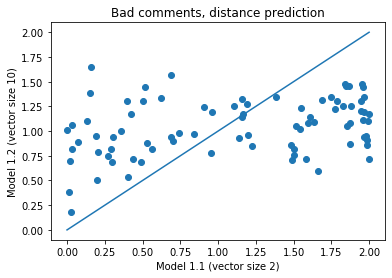

In [33]:
# plot model1_1(vector size = 2) and model1_2 (vector size = 10)
import matplotlib.pyplot as plt
plt.scatter(bad_comments_['model1_1_distance'], bad_comments_['model1_2_distance'])
plt.plot([0,2],[0,2])
plt.xlabel("Model 1.1 (vector size 2)")
plt.ylabel("Model 1.2 (vector size 10)")
plt.title("Bad comments, distance prediction")

In [34]:
# run test for good comments
good_comments_comment = good_comments['clean_comment'].values.tolist()
good_comments_article = good_comments['clean_article'].values.tolist()

output1_1_good = []
for i in range(len(good_comments)):
    comment_vec = good_comments_comment[i]
    article_vec = good_comments_article[i]
    output1_1_good.append(infer_vectors(model1_1, comment_vec, article_vec))

model1_1_distance = []
for i, j in output1_1_good:
    model1_1_distance.append(distance(i,j))
       
output1_2_good = []
for i in range(len(good_comments)):
    comment_vec = good_comments_comment[i]
    article_vec = good_comments_article[i]
    output1_2_good.append(infer_vectors(model1_2, comment_vec, article_vec))

model1_2_distance = []
for i, j in output1_2_good:
    model1_2_distance.append(distance(i,j))

In [35]:
tmp1 = pd.DataFrame(output1_1_good[0:], columns=['model1_1_comment_vec','model1_1_article_vec'])
tmp2 = pd.DataFrame(output1_2_good[0:], columns=['model1_2_comment_vec','model1_2_article_vec'])
good_comments_ = pd.concat([tmp1.reset_index(drop=True), tmp2.reset_index(drop=True)], axis=1)

In [36]:
good_comments_['model1_1_distance'] = model1_1_distance
good_comments_['model1_2_distance'] = model1_2_distance
good_comments_.head()

,model1_1_comment_vec,model1_1_article_vec,model1_2_comment_vec,model1_2_article_vec,model1_1_distance,model1_2_distance
0,"[0.007611596, 0.21060906]","[-0.049283154, -0.0072091967]","[0.0015223193, 0.042121813, 0.043246813, -0.00...","[-0.009856631, -0.0014418394, -0.03146524, -0....",1.180383,0.901806
1,"[0.23023999, 0.15782459]","[0.19500649, -0.12694676]","[0.046047997, 0.031564917, -0.01680201, -0.022...","[0.039001297, -0.025389351, 0.0022801145, 0.03...",0.617211,1.054916
2,"[-0.22962232, 0.01379679]","[-0.061300267, 0.084426515]","[-0.045924466, 0.002759358, -0.0108194, -0.004...","[-0.012260053, 0.016885303, -0.046290845, 0.04...",0.364986,0.746361
3,"[0.15989272, -0.09264464]","[-0.22621715, -0.21276015]","[0.031978544, -0.018528927, -0.010804075, 0.03...","[-0.04524343, -0.04255203, -0.042733744, -0.03...",1.286811,1.040287
4,"[-0.03988991, -0.058571238]","[-0.0082455985, -0.01599882]","[-0.007977982, -0.011714248, -0.038057216, 0.0...","[-0.0016491198, -0.003199764, -0.036964267, 0....",0.007434,0.382611


Text(0.5, 1.0, 'Cosine distance prediction using sample1')

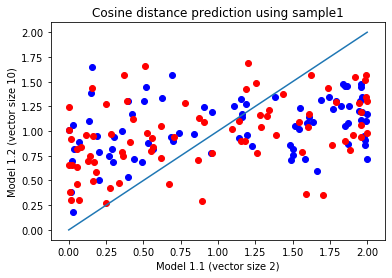

In [37]:
## Visualize
## bad = blue
## good = red

plt.scatter(bad_comments_['model1_1_distance'], bad_comments_['model1_2_distance'], color = 'blue')
plt.scatter(good_comments_['model1_1_distance'], good_comments_['model1_2_distance'], color = 'red')

plt.plot([0,2],[0,2])
plt.xlabel("Model 1.1 (vector size 2)")
plt.ylabel("Model 1.2 (vector size 10)")
plt.title("Cosine distance prediction using sample1")

Good comments, the **red** ones are supposed to be closer than the bad comments (blue).
Ideal plot shape would be...
where red ones are clumped together in the bottom left corner and blue ones are clumped on the upper right corner

# Sample 2

Sample2 training dataset size is 10,000 - which is 10x bigger than sample 1.

In [54]:
## Try it with sample2

## Vector size 2
sample2_1 = training(sample2, 'clean_comment', 10000)

common_kwargs = dict(
    vector_size=2, epochs=20, min_count=2,
    sample=0, workers=cores, negative=5, hs=0
)

model2_1 = Doc2Vec(dm=0, **common_kwargs)
model2_1.build_vocab(sample2_1)

output2_1 = []
for i in range(len(good_comments)):
    comment_vec = bad_comments_comment[i]
    article_vec = bad_comments_article[i]
    output2_1.append(infer_vectors(model2_1, comment_vec, article_vec))
    
# append this to model2_1 vectors on bad_comments_ dataframe
df2_1 = pd.DataFrame(output2_1[0:],columns=['model2_1_comment_vec','model2_1_article_vec'])

model2_1_distance = []
for i, j in output2_1:
    model2_1_distance.append(distance(i,j))

df2_1['model2_1_distance'] = model2_1_distance
df2_1.head()

,model2_1_comment_vec,model2_1_article_vec,model2_1_distance
0,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591
1,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383
2,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592
3,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537
4,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034


In [39]:
bad_comments_ = pd.concat([bad_comments_.reset_index(drop=True), df2_1.reset_index(drop=True)], axis=1)
bad_comments_.head()

,clean_comment,clean_article,comment_id,model1_1_comment_vec,model1_1_article_vec,model1_1_distance,model1_2_comment_vec,model1_2_article_vec,model1_2_distance,model2_1_comment_vec,model2_1_article_vec,model2_1_distance
0,"['thank', 'melissa', 'clark', 'learn', 'especi...","['melissa', 'clark', 'food', 'grow', 'eat', 'b...",209829,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863...",1.300275,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591
1,"['brava', 'talya', '-pron-', 'fly', 'george']","['gym', 'pool', 'close', 'sport', 'league', 's...",285139,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0...",0.720749,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383
2,"['hipsters', 'annoy']","['transformation', 'medieval', 'honey', 'wine'...",169120,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0...",1.085903,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592
3,"['d', 'j', 't', 'm', 'b', 's', 'power', 'sorta...","['president', 'trump', 'cite', 'maj', 'gen', '...",95821,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004...",0.953752,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537
4,"['know', 'thing']","['mandatory', 'secret', 'trimester', 'mandator...",25069,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04...",0.882335,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034


In [40]:
## Vector size 10
common_kwargs = dict(
    vector_size=10, epochs=20, min_count=2,
    sample=0, workers=cores, negative=5, hs=0
)

model2_2 = Doc2Vec(dm=0, **common_kwargs)
model2_2.build_vocab(sample2_1)

output2_2 = []
for i in range(len(bad_comments)):
    comment_vec = bad_comments_comment[i]
    article_vec = bad_comments_article[i]
    output2_2.append(infer_vectors(model2_2, comment_vec, article_vec))
    
# append this to model2_1 vectors on bad_comments_ dataframe
df2_2 = pd.DataFrame(output2_2[0:],columns=['model2_2_comment_vec','model2_2_article_vec'])

model2_2_distance = []
for i, j in output2_2:
    model2_2_distance.append(distance(i,j))

df2_2['model2_2_distsance'] = model2_2_distance
df2_2.head()

,model2_2_comment_vec,model2_2_article_vec,model2_2_distsance
0,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863...",1.300275
1,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0...",0.720749
2,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0...",1.085903
3,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004...",0.953752
4,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04...",0.882335


In [41]:
bad_comments_ = pd.concat([bad_comments_.reset_index(drop=True), df2_2.reset_index(drop=True)], axis=1)
bad_comments_.head()

,clean_comment,clean_article,comment_id,model1_1_comment_vec,model1_1_article_vec,model1_1_distance,model1_2_comment_vec,model1_2_article_vec,model1_2_distance,model2_1_comment_vec,model2_1_article_vec,model2_1_distance,model2_2_comment_vec,model2_2_article_vec,model2_2_distsance
0,"['thank', 'melissa', 'clark', 'learn', 'especi...","['melissa', 'clark', 'food', 'grow', 'eat', 'b...",209829,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863...",1.300275,"[-0.06288164, 0.2342558]","[0.13285775, 0.17002991]",0.398591,"[-0.012576329, 0.046851162, 0.0019590205, 0.00...","[0.026571551, 0.03400598, 0.021229101, 0.02863...",1.300275
1,"['brava', 'talya', '-pron-', 'fly', 'george']","['gym', 'pool', 'close', 'sport', 'league', 's...",285139,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0...",0.720749,"[-0.080165476, -0.16218132]","[-0.14922225, -0.020980645]",0.436383,"[-0.016033096, -0.032436263, -0.027571505, -0....","[-0.029844452, -0.004196129, -0.03332112, -0.0...",0.720749
2,"['hipsters', 'annoy']","['transformation', 'medieval', 'honey', 'wine'...",169120,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0...",1.085903,"[-0.1465638, -0.14959203]","[-0.0125454115, 0.07893252]",1.595592,"[-0.02931276, -0.029918404, 0.048569005, -0.00...","[-0.0025090822, 0.015786504, -0.036702644, 0.0...",1.085903
3,"['d', 'j', 't', 'm', 'b', 's', 'power', 'sorta...","['president', 'trump', 'cite', 'maj', 'gen', '...",95821,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004...",0.953752,"[0.043450058, 0.17019767]","[-0.07845362, -0.15559919]",1.976537,"[0.008690012, 0.034039535, 0.014731137, 0.0377...","[-0.015690725, -0.03111984, 0.044881403, 0.004...",0.953752
4,"['know', 'thing']","['mandatory', 'secret', 'trimester', 'mandator...",25069,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04...",0.882335,"[0.15016164, -0.19803573]","[0.17042434, 0.027813604]",0.532034,"[0.030032327, -0.039607145, 0.0015188355, -0.0...","[0.034084868, 0.005562721, -0.018789107, -0.04...",0.882335


# Model 2 versions on good comments

In [42]:
# run test for good comments
good_comments_comment = good_comments['clean_comment'].values.tolist()
good_comments_article = good_comments['clean_article'].values.tolist()

output2_1_good = []
for i in range(len(good_comments)):
    comment_vec = good_comments_comment[i]
    article_vec = good_comments_article[i]
    output2_1_good.append(infer_vectors(model2_1, comment_vec, article_vec))

model2_1_distance = []
for i, j in output2_1_good:
    model2_1_distance.append(distance(i,j))
       
output2_2_good = []
for i in range(len(good_comments)):
    comment_vec = good_comments_comment[i]
    article_vec = good_comments_article[i]
    output2_2_good.append(infer_vectors(model2_2, comment_vec, article_vec))

model2_2_distance = []
for i, j in output2_2_good:
    model2_2_distance.append(distance(i,j))

In [44]:
tmp2_1 = pd.DataFrame(output2_1_good[0:], columns=['model2_1_comment_vec','model2_1_article_vec'])
tmp2_2 = pd.DataFrame(output2_2_good[0:], columns=['model2_2_comment_vec','model2_2_article_vec'])
good_comment_df = pd.concat([good_comments_.reset_index(drop=True), tmp2_1.reset_index(drop=True), tmp2_2.reset_index(drop=True)], axis=1)

In [45]:
good_comments_['model2_1_distance'] = model2_1_distance
good_comments_['model2_2_distance'] = model2_2_distance
good_comments_.head()

,model1_1_comment_vec,model1_1_article_vec,model1_2_comment_vec,model1_2_article_vec,model1_1_distance,model1_2_distance,model2_1_distance,model2_2_distance
0,"[0.007611596, 0.21060906]","[-0.049283154, -0.0072091967]","[0.0015223193, 0.042121813, 0.043246813, -0.00...","[-0.009856631, -0.0014418394, -0.03146524, -0....",1.180383,0.901806,1.180383,0.901806
1,"[0.23023999, 0.15782459]","[0.19500649, -0.12694676]","[0.046047997, 0.031564917, -0.01680201, -0.022...","[0.039001297, -0.025389351, 0.0022801145, 0.03...",0.617211,1.054916,0.617211,1.054916
2,"[-0.22962232, 0.01379679]","[-0.061300267, 0.084426515]","[-0.045924466, 0.002759358, -0.0108194, -0.004...","[-0.012260053, 0.016885303, -0.046290845, 0.04...",0.364986,0.746361,0.364986,0.746361
3,"[0.15989272, -0.09264464]","[-0.22621715, -0.21276015]","[0.031978544, -0.018528927, -0.010804075, 0.03...","[-0.04524343, -0.04255203, -0.042733744, -0.03...",1.286811,1.040287,1.286811,1.040287
4,"[-0.03988991, -0.058571238]","[-0.0082455985, -0.01599882]","[-0.007977982, -0.011714248, -0.038057216, 0.0...","[-0.0016491198, -0.003199764, -0.036964267, 0....",0.007434,0.382611,0.007434,0.382611


# Visualize, model comparison

### 1) Different samples & sample sizes

Text(0, 0.5, 'Model 2.1')

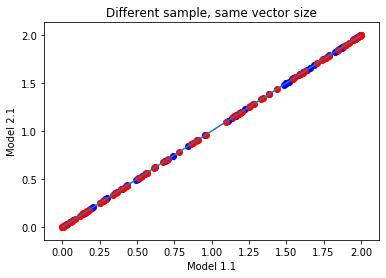

In [49]:
# Vector size = 2; model1_1 vs model2_1

plt.scatter(bad_comments_['model1_1_distance'], bad_comments_['model2_1_distance'], color = 'blue') # bad ones
plt.scatter(good_comments_['model1_1_distance'], good_comments_['model2_1_distance'], color = 'red') # good ones
plt.plot([0,2], [0,2]) # y = x line
plt.title("Different sample, same vector size")
plt.xlabel("Model 1.1")
plt.ylabel("Model 2.1")

Text(0, 0.5, 'Model 2.2')

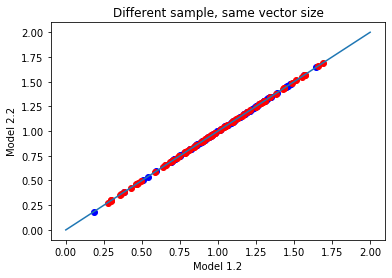

In [53]:
# Vector size = 10; model1_2 vs model2_2

plt.scatter(bad_comments_['model1_2_distance'], bad_comments_['model2_2_distsance'], color = 'blue') # bad ones
plt.scatter(good_comments_['model1_2_distance'], good_comments_['model2_2_distance'], color = 'red') # good ones
plt.plot([0,2], [0,2]) # y = x line
plt.title("Different sample, same vector size")
plt.xlabel("Model 1.2")
plt.ylabel("Model 2.2")

------------------
Thoughts:

Something is not right. Why are they "exactly" the same? Shouldn't it yield different lengths if different data was used?


Something is definitely wrong. 

doc2vec documentation:
https://radimrehurek.com/gensim/models/doc2vec.html